In [105]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()
bos = pd.DataFrame(boston.data)

bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [106]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**CRIM**: a numeric vector of per capita crime

**ZN**: a numeric vector of proportions of residential land zoned for lots over 25000 sq. ft per town (constant for all Boston tracts)

**INDUS**: a numeric vector of proportions of non-retail business acres per town (constant for all Boston tracts)

**CHAS**: a factor with levels 1 if tract borders Charles River; 0 otherwise

**NOX**: a numeric vector of nitric oxides concentration (parts per 10 million) per town

**RM**: a numeric vector of average numbers of rooms per dwelling

**AGE**: a numeric vector of proportions of owner-occupied units built prior to 1940

**DIS**: a numeric vector of weighted distances to five Boston employment centres

**RAD**: a numeric vector of an index of accessibility to radial highways per town (constant for all Boston tracts)

**TAX**: a numeric vector full-value property-tax rate per USD 10,000 per town (constant for all Boston tracts)

**PTRATIO**: a numeric vector of pupil-teacher ratios per town (constant for all Boston tracts)

**B**: a numeric vector of 1000*(Bk - 0.63)^2 where Bk is the proportion of blacks

**LSTAT**: a numeric vector of percentage values of lower status population

**PRICE**: price of the house


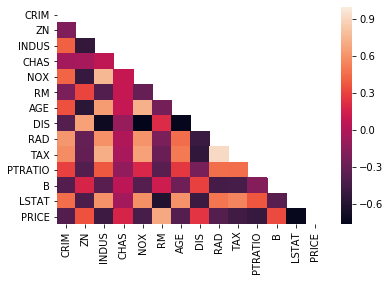

In [107]:
import seaborn as sns
matrix = np.triu(bos.corr())
ax = sns.heatmap(bos.corr(), mask=matrix)

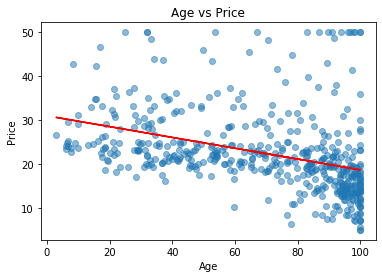

In [108]:
from sklearn.linear_model import LinearRegression

x = bos['AGE']
y = bos['PRICE']

x_reshaped = x.values.reshape(-1, 1)

regressor = LinearRegression()  
regressor.fit(x_reshaped, y) #training the algorithm
y_pred = regressor.predict(x_reshaped)

fig, ax = plt.subplots()

ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('Price', fontsize=10)
ax.set_title('Age vs Price')

ax.scatter(x, y, alpha=0.5)
plt.plot(x_reshaped, y_pred, color='red')

plt.show()

## Generally as the age of the house goes up, the price goes down.

In [189]:
from sklearn.model_selection import train_test_split

#Getting train and test data
X = bos[bos.columns[:13]]
Y = bos['PRICE']
#Randomly sampling 75% of the data and 25% for tests
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [190]:
# Instansiate the model (Linear Regression) and train it
bos_reg = LinearRegression()
bos_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Not sure these are the correct MSE and R2 scores. They don't seem like it.

In [191]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#Retrieving coefficient and intercept
w1 = bos_reg.coef_
w0 = bos_reg.intercept_

#Ended up using built in predict model instead of using w1 and w0
y_pred = bos_reg.predict(X)
print(f'MSE: {mean_squared_error(Y, y_pred)}')
print(f'R2 Score: {r2_score(Y, y_pred)}')

MSE: 22.18597231205444
R2 Score: 0.73719392375135


In [192]:
from sklearn.preprocessing import StandardScaler
#Scaling data to reduce variance
scaled_X = StandardScaler().fit_transform(X)
scaled_X_train = StandardScaler().fit_transform(X_train)
bos_reg_scaler = LinearRegression().fit(scaled_X_train, Y_train)

In [193]:
y_pred = bos_reg_scaler.predict(scaled_X)
print(f'MSE: {mean_squared_error(Y, y_pred)}')
print(f'R2 Score: {r2_score(Y, y_pred)}')

MSE: 22.22573966140342
R2 Score: 0.7367228557765857


In [195]:
from sklearn.preprocessing import MinMaxScaler

#Scaling data to reduce variance
scaledmm_X = StandardScaler().fit_transform(X)
scaledmm_X_train = StandardScaler().fit_transform(X_train)
bos_reg_scaler_mm = LinearRegression().fit(scaledmm_X_train, Y_train)

In [196]:
y_pred = bos_reg_scaler.predict(scaledmm_X)
print(f'MSE: {mean_squared_error(Y, y_pred)}')
print(f'R2 Score: {r2_score(Y, y_pred)}')

MSE: 22.22573966140342
R2 Score: 0.7367228557765857
